In [13]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import importlib
import ipynbname

In [14]:
base_path = os.path.dirname(ipynbname.path())
parent_path = os.path.dirname(base_path)  
src_path = parent_path + '/src'
filtered_data_path = parent_path + '/data/filtered'
saved_models_path = src_path + '/config'

print(f"parent path: {parent_path}")
print(f"base path: {base_path}")
print(f"filtered data path: {filtered_data_path}")
print(f"saved models path: {saved_models_path}")

parent path: /home/sid/coding/dark_light/mass_recon
base path: /home/sid/coding/dark_light/mass_recon/notebooks
filtered data path: /home/sid/coding/dark_light/mass_recon/data/filtered
saved models path: /home/sid/coding/dark_light/mass_recon/src/config


In [11]:
# import utils file
utils_path = os.path.join(parent_path, "utils")
sys.path.append(utils_path)
import data_utils
importlib.reload(data_utils)
from data_utils import *

# 1. Training Electron Side

In [5]:
side = 'electron'

In [6]:
electron_data = []
for scat in ['n', 'y']:
    data1 = []
    data_train, data_test = get_data_path(side = 'electron', 
                                          scat = scat, 
                                          data_path = filtered_data_path)
    print(f"Training Data:\t{data_train}")
    print(f"Test Data:\t{data_test} ")

    print(f"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Processing: {scat} XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" )
    for target in ['P', 'ip', 'oop']:
        # storing parameters for the current target
        current_data = {}
    
        print(f"----------------------- Processing: {target} -----------------------" )
        # instantiate the model:
        electron = Analysis(side=side, 
                            scat=scat,
                            data_train = data_train,
                            data_test = data_test,
                            target = target,
                            n_jobs = 10)
        # load the best param dictionary:
        if scat=='y':
            load_model_path = f"{base_path}models/{side}/{side}_{target}_scat_params_dict.json"
        elif scat=='n':
            load_model_path = f"{base_path}models/{side}/{side}_{target}_no_scat_params_dict.json"
        with open(load_model_path, "r") as f:
            best_params = json.load(f)
        current_data['best_params'] = best_params      
    
        # train the model:
        model = electron.train_model(best_params)
        current_data['trained_model'] = model 
    
        # save the model:
        electron.save_model(base_path)
    
        # validation set:
        train_pred, val_pred = electron.validation()
        current_data['train_actual'] = electron.Y_train
        current_data['train_pred'] = train_pred
        current_data['val_pred']   = val_pred
        current_data['val_actual'] = electron.Y_val
        
        # evaluate on the test set:
        test_pred = electron.test()
        current_data['signal_pred'] = test_pred
        current_data['signal_actual'] = electron.Y_test
        print(f"Length of test_pred: {len(test_pred)}")
        print(f"Length of test_actual: {len(electron.Y_test)}")
    
        # store the current dictionary
        data1.append(current_data)
    
        print(f"-----------------------   End: {target}   -----------------------" )
    print(f"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX End: {scat} XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" )
    electron_data.append(data1)

NameError: name 'get_data_path' is not defined

In [8]:
# ELECTRON (SCATTERING AND NO SCATTERING)
p_e_no_scat, ip_e_no_scat, oop_e_no_scat = electron_data[0] # NO SCATTERING DATA 
p_e_scat,    ip_e_scat,    oop_e_scat    = electron_data[1] # SCATTERING DATA  

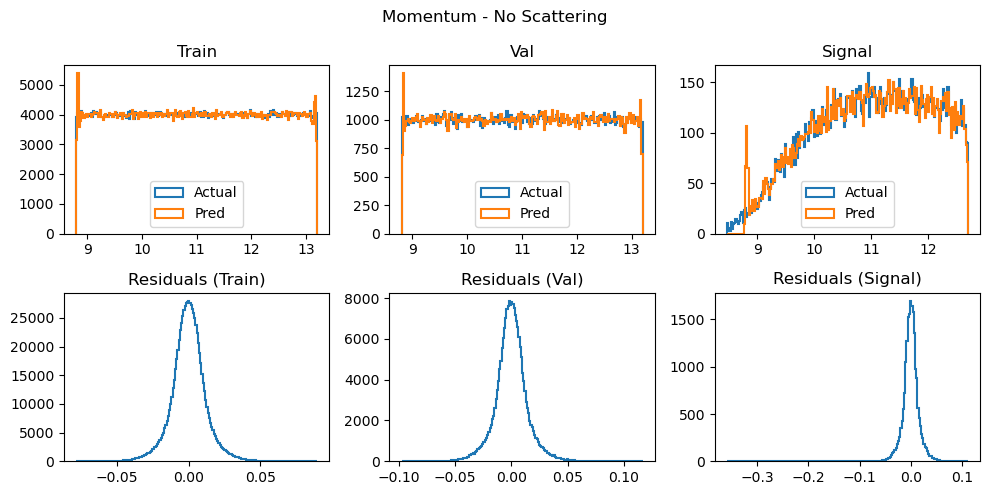

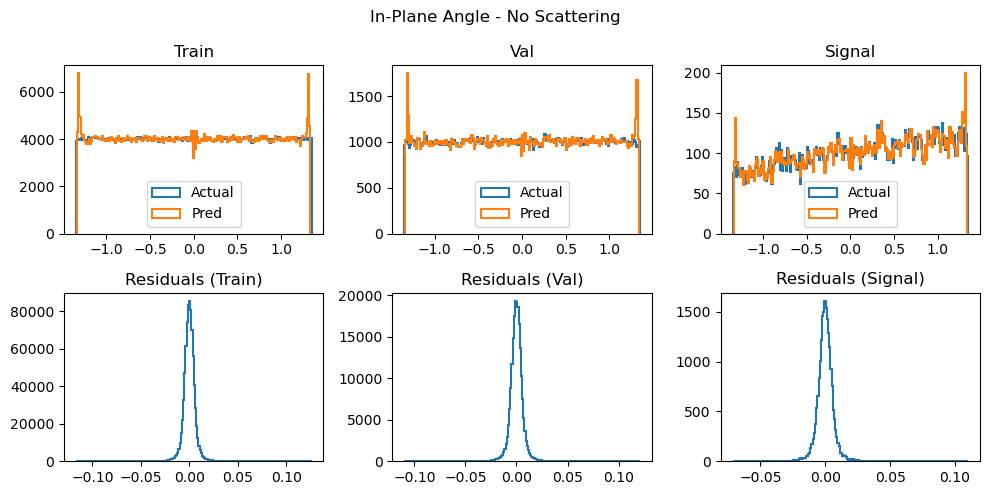

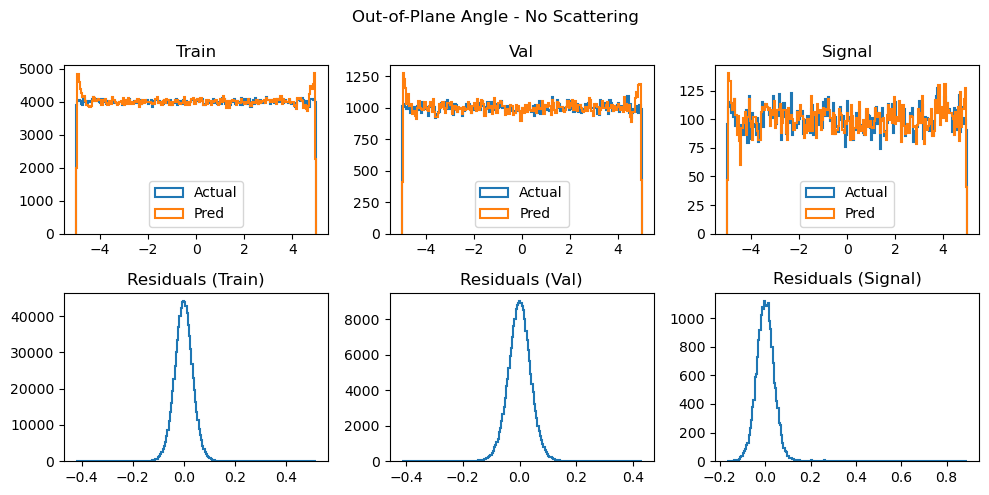

In [9]:
# NO SCATTERING ELECTRONS
plot_histograms(p_e_no_scat, "Momentum - No Scattering")
plot_histograms(ip_e_no_scat, "In-Plane Angle - No Scattering")
plot_histograms(oop_e_no_scat, "Out-of-Plane Angle - No Scattering")

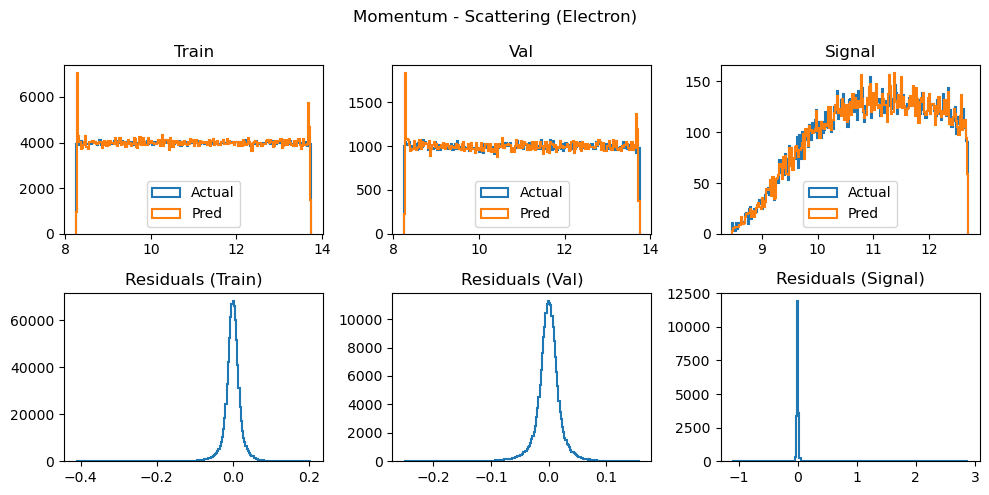

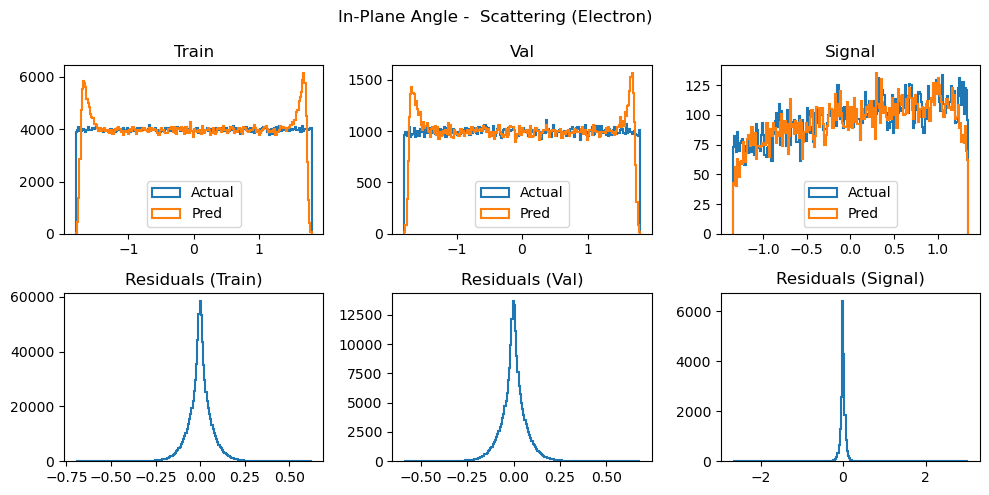

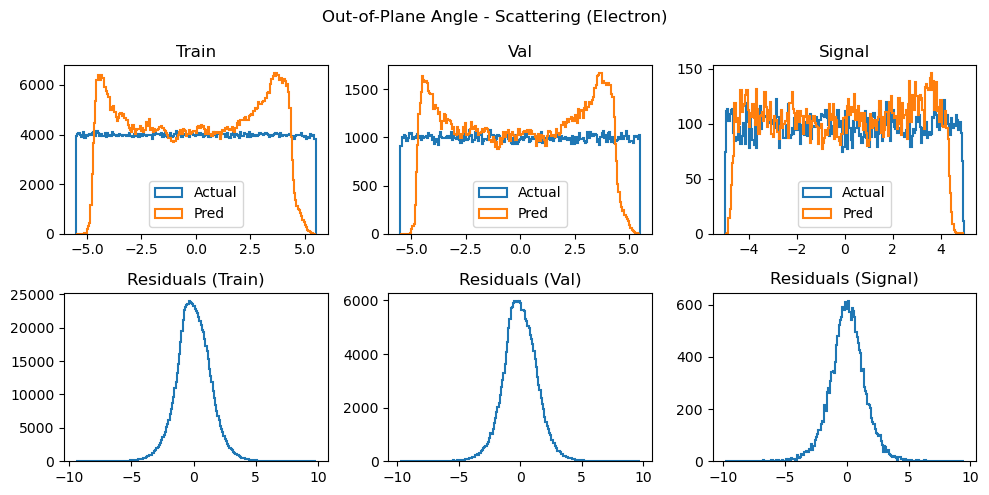

In [10]:
# SCATTERING ELECTRONS
plot_histograms(p_e_scat, "Momentum - Scattering (Electron)")
plot_histograms(ip_e_scat, "In-Plane Angle -  Scattering (Electron)")
plot_histograms(oop_e_scat, "Out-of-Plane Angle - Scattering (Electron)")

# 2. Training Positron Side

In [11]:
side = 'positron'

In [12]:
positron_data = []
for scat in ['n', 'y']:
    data1 = []
    data_train, data_test = get_data_path(side, scat, data_path) # renamed it to 'get_data_path'
    print(f"Training Data:\t{data_train}")
    print(f"Test Data:\t{data_test} ")

    print(f"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Processing: {scat} XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" )
    for target in ['P', 'ip', 'oop']:
        # storing parameter for the current target
        current_data = {}
    
        print(f"----------------------- Processing: {target} -----------------------" )
        # instantiate the model:
        positron = Analysis(side=side, 
                            scat=scat,
                            data_train = data_train,
                            data_test = data_test,
                            target = target,
                            n_jobs = 10)
        # load the best param dictionary:
        if scat=='y':
            save_path = f"{base_path}models/{side}/{side}_{target}_scat_params_dict.json"
        elif scat=='n':
            save_path = f"{base_path}models/{side}/{side}_{target}_no_scat_params_dict.json"
        with open(save_path, "r") as f:
            best_params = json.load(f)
        current_data['best_params'] = best_params      
    
        # train the model:
        model = positron.train_model(best_params)
        current_data['trained_model'] = model 
    
        # save the model:
        positron.save_model(base_path)
    
        # validation set:
        train_pred, val_pred = positron.validation()
        current_data['train_actual'] = positron.Y_train
        current_data['train_pred'] = train_pred
        current_data['val_pred']   = val_pred
        current_data['val_actual'] = positron.Y_val
    
        # evaluate on the test set:
        test_pred = positron.test()
        test_actual = positron.Y_test
        current_data['signal_pred'] = test_pred
        current_data['signal_actual'] = positron.Y_test
        print(f"Length of test_pred: {len(test_pred)}")
        print(f"Length of test_actual: {len(test_actual)}")
    
        # store the current dictionary
        data1.append(current_data)
    
        print(f"-----------------------   End: {target}   -----------------------" )
    print(f"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX End: {scat} XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" )
    positron_data.append(data1)

Training Data:	/home/sid/coding/rough_work/path_recon_ml_models/mass_recon_data/PositronCoords_no_scat.dat
Test Data:	/home/sid/coding/rough_work/path_recon_ml_models/mass_recon_data/PositronSort_no_scat.dat 
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Processing: n XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
----------------------- Processing: P -----------------------
Removed 622 Outliers from dataset:	train!!
Removed 10 Outliers from dataset:	test!!
Training model with the Selected Parameters...
Model trained in 46.96 seconds.
Model saved successfully at: /home/sid/coding/rough_work/path_recon_ml_models/models/positron/positron_P_no_scat.json
Duration: 0.23796939849853516
Training RMSE: 0.0129
Validation RMSE: 0.0129
Test Duration: 0.0306 seconds
Test RMSE: 0.0157
Length of test_pred: 19936
Length of test_actual: 19936
-----------------------   End: P   -----------------------
----------------------- Processing: ip -----------------------
Removed 622 Outliers from dataset:	train!!
Removed 10 Outliers from da

In [19]:
# POSITRON
p_p_no_scat, ip_p_no_scat, oop_p_no_scat = positron_data[0] # NO SCATTERING DATA - 
p_p_scat,    ip_p_scat,    oop_p_scat    = positron_data[1] # SCATTERING DATA  

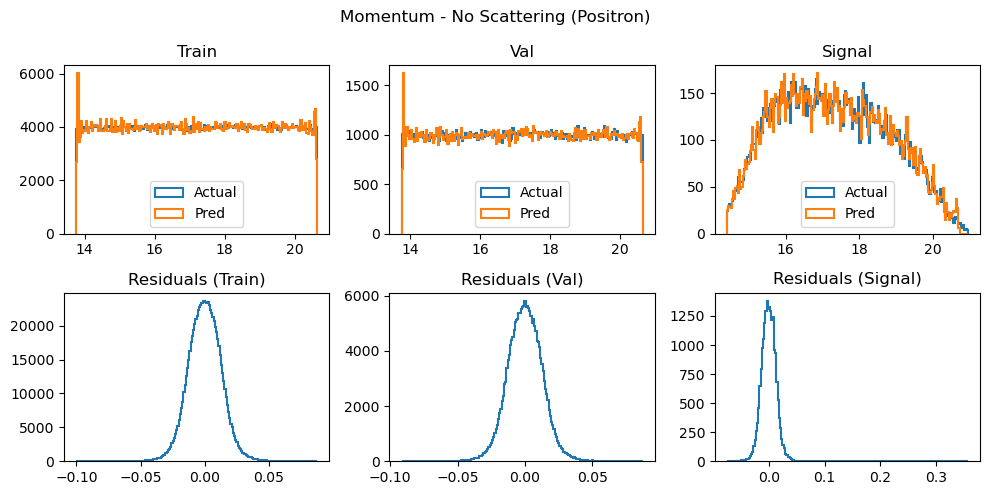

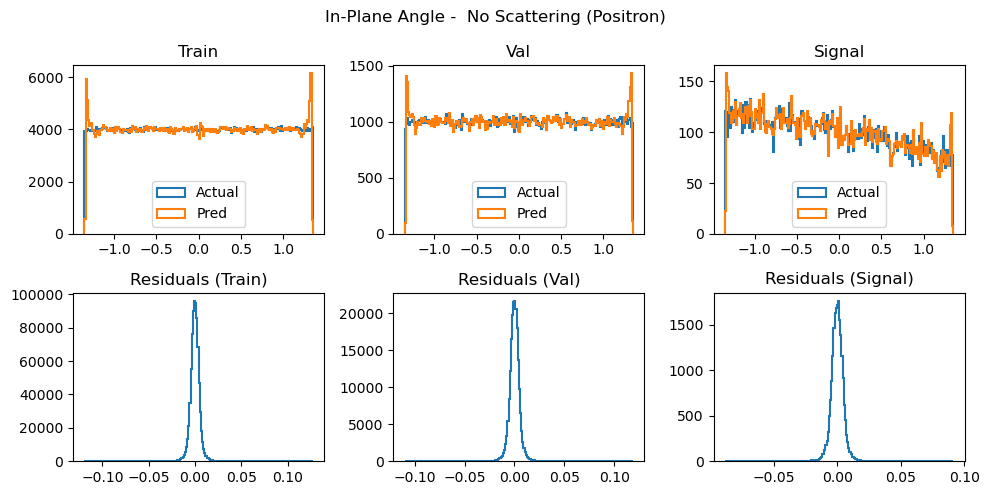

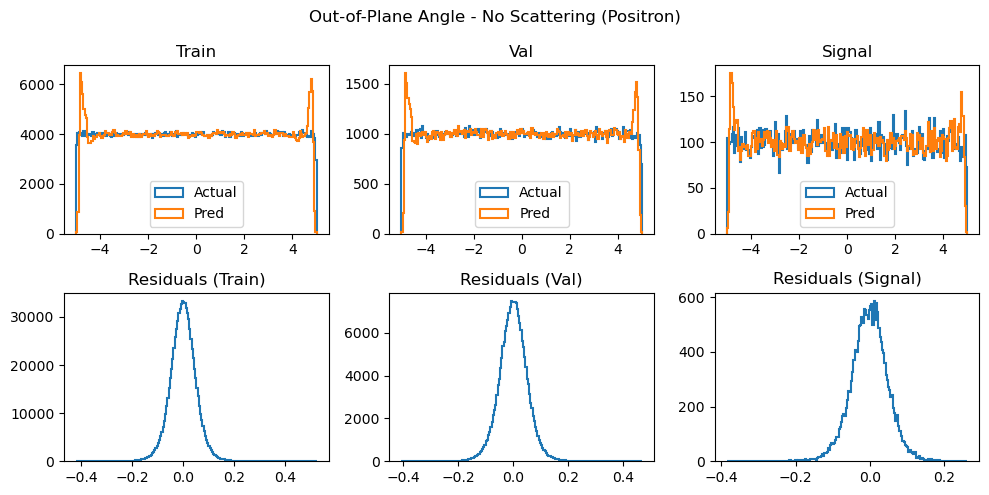

In [20]:
# NO SCATTERING POSITRONS
plot_histograms(p_p_no_scat, "Momentum - No Scattering (Positron)")
plot_histograms(ip_p_no_scat, "In-Plane Angle -  No Scattering (Positron)")
plot_histograms(oop_p_no_scat, "Out-of-Plane Angle - No Scattering (Positron)")

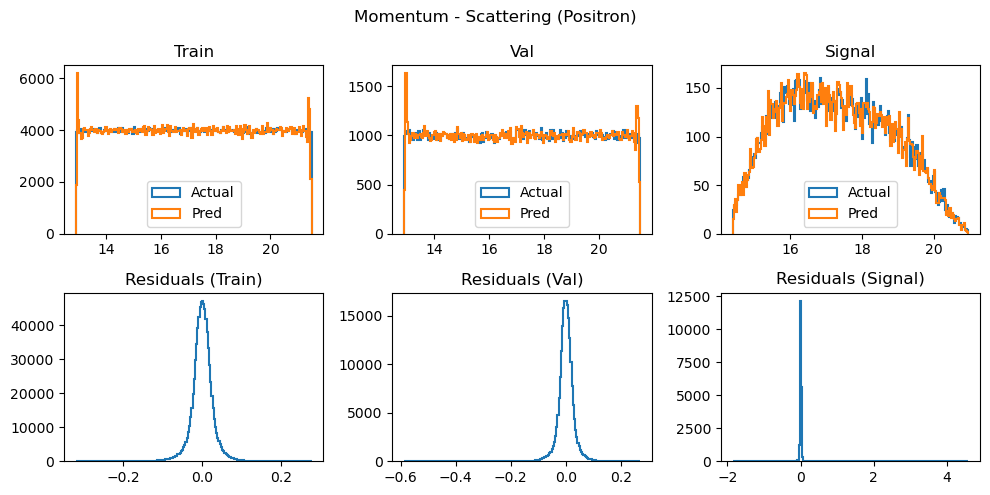

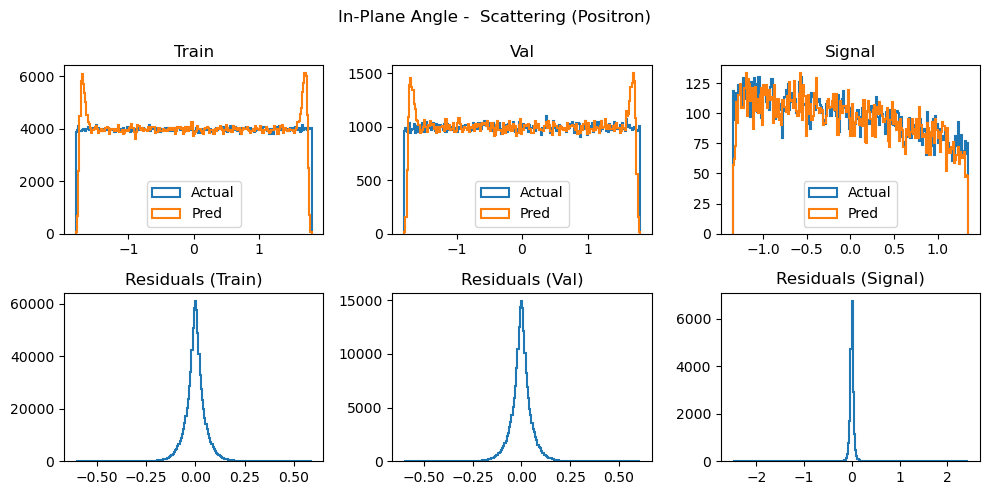

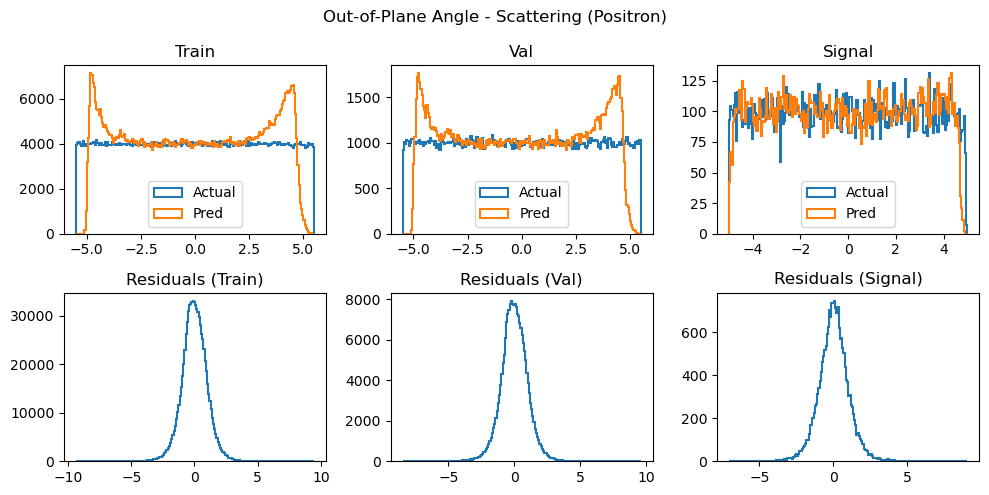

In [21]:
# SCATTERING POSITRONS
plot_histograms(p_p_scat, "Momentum - Scattering (Positron)")
plot_histograms(ip_p_scat, "In-Plane Angle -  Scattering (Positron)")
plot_histograms(oop_p_scat, "Out-of-Plane Angle - Scattering (Positron)")

# 3. Visualizing the Result

In [16]:
# electron side
p_e_no_scat, ip_e_no_scat, oop_e_no_scat = electron_data[0]
p_e_scat,    ip_e_scat,    oop_e_scat    = electron_data[1]

# positron side
p_p_no_scat, ip_p_no_scat, oop_p_no_scat = positron_data[0]
p_p_scat,    ip_p_scat,    oop_p_scat    = positron_data[1]

In [17]:
p_noscat       = [p_e_no_scat['test_actual'], p_p_no_scat['test_actual']]
p_pred_noscat  = [p_e_no_scat['test_pred'], p_p_no_scat['test_pred']]
p_train_noscat  = [p_e_no_scat['train_actual'], p_p_no_scat['train_actual']]

ip_noscat       = [ip_e_no_scat['test_actual'], ip_p_no_scat['test_actual']]
ip_pred_noscat  = [ip_e_no_scat['test_pred'], ip_p_no_scat['test_pred']]
ip_train_noscat  = [ip_e_no_scat['train_actual'], ip_p_no_scat['train_actual']]

oop_noscat       = [oop_e_no_scat['test_actual'], oop_p_no_scat['test_actual']]
oop_pred_noscat  = [oop_e_no_scat['test_pred'], oop_p_no_scat['test_pred']]
oop_train_noscat  = [oop_e_no_scat['train_actual'], oop_p_no_scat['train_actual']]

KeyError: 'test_actual'

In [94]:
p_scat       = [p_e_scat['test_actual'], p_p_scat['test_actual']]
p_pred_scat  = [p_e_scat['test_pred'], p_p_scat['test_pred']]
p_train_scat  = [p_e_scat['train_actual'], p_p_scat['train_actual']]


ip_scat       = [ip_e_scat['test_actual'], ip_p_scat['test_actual']]
ip_pred_scat  = [ip_e_scat['test_pred'], ip_p_scat['test_pred']]
ip_train_scat  = [ip_e_scat['train_actual'], ip_p_scat['train_actual']]

oop_scat       = [oop_e_scat['test_actual'], oop_p_scat['test_actual']]
oop_pred_scat  = [oop_e_scat['test_pred'], oop_p_scat['test_pred']]
oop_train_scat  = [oop_e_scat['train_actual'], oop_p_scat['train_actual']]

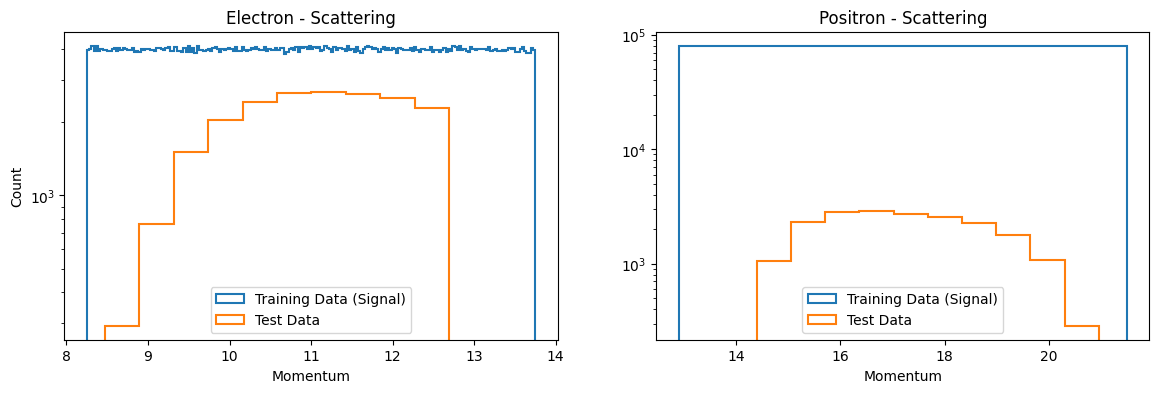

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

bins_p_e = np.histogram_bin_edges(p_train_scat[0], bins=200)
axes[0].hist(p_train_scat[0], label='Training Data (Signal)', bins=bins_p_e, histtype='step', linewidth=1.5)
axes[0].hist(p_scat[0], label='Test Data', histtype='step', linewidth=1.5)
axes[0].set_title("Electron - Scattering")
axes[0].set_xlabel("Momentum")
axes[0].set_ylabel("Count")
axes[0].set_yscale('log')
axes[0].legend()

bins_p_p = np.histogram_bin_edges(p_train_scat[1], bins=200)
axes[1].hist(p_train_scat[1], label='Training Data (Signal)', histtype='step', linewidth=1.5)
axes[1].hist(p_scat[1], label='Test Data', histtype='step', linewidth=1.5)
axes[1].set_title("Positron - Scattering")
axes[1].set_xlabel("Momentum")
axes[1].set_yscale('log')
axes[1].legend()

plt.savefig("range_diff", dpi=300)
plt.show()

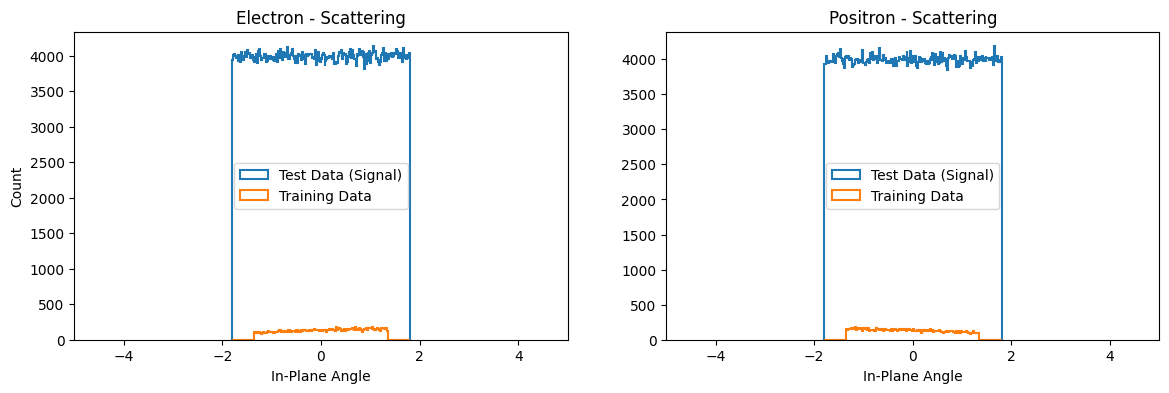

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

bins_ip_e = np.histogram_bin_edges(ip_train_scat[0], bins=200)
axes[0].hist(ip_train_scat[0], label='Test Data (Signal)', bins=bins_ip_e, histtype='step', linewidth=1.5)
axes[0].hist(ip_scat[0], label='Training Data', bins=bins_ip_e, histtype='step', linewidth=1.5)
axes[0].set_title("Electron - Scattering")
axes[0].set_xlabel("In-Plane Angle")
axes[0].set_ylabel("Count")
# axes[0].set_yscale('log')
axes[0].set_xlim(-5,5)
axes[0].legend()

bins_ip_p = np.histogram_bin_edges(ip_train_scat[1], bins=200)
axes[1].hist(ip_train_scat[1], label='Test Data (Signal)', bins=bins_ip_p, histtype='step', linewidth=1.5)
axes[1].hist(ip_scat[1], label='Training Data', bins=bins_ip_p, histtype='step', linewidth=1.5)
axes[1].set_title("Positron - Scattering")
axes[1].set_xlabel("In-Plane Angle")
# axes[1].set_yscale('log')
axes[1].set_xlim(-5,5)
axes[1].legend()

plt.savefig("range_diff_ip", dpi=300)
plt.show()

(-10.0, 10.0)

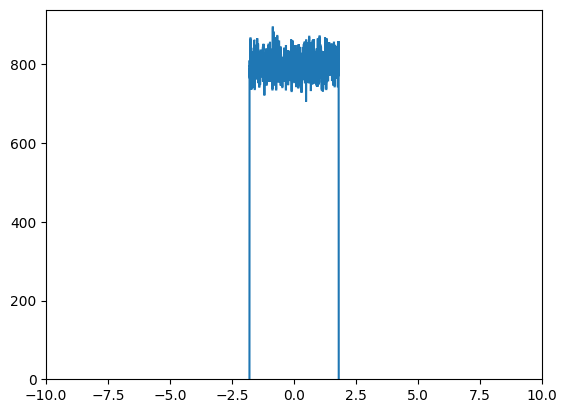

In [97]:
plt.hist(ip_train_scat[1], label='Test Data (Signal)', histtype='step', linewidth=1.5, bins=1000)
plt.xlim(-10,10)

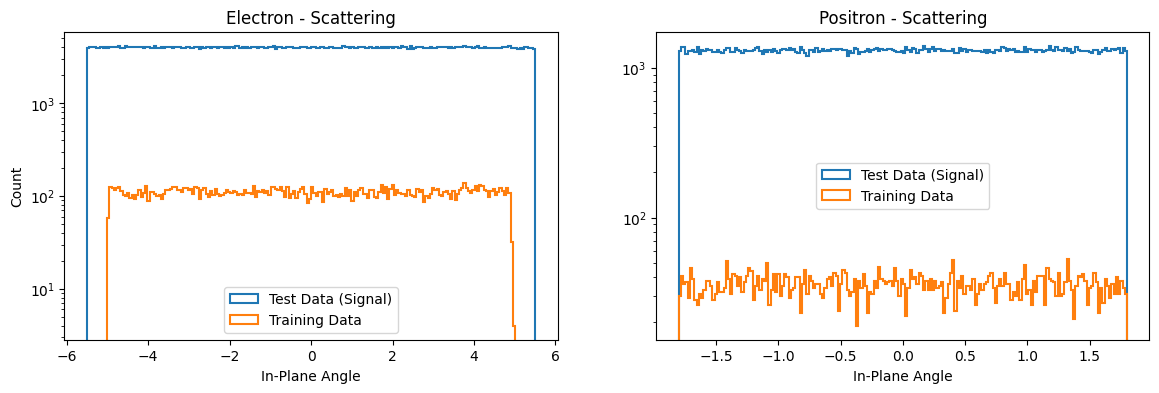

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

bins_oop_e = np.histogram_bin_edges(oop_train_scat[0], bins=200)
axes[0].hist(oop_train_scat[0], label='Test Data (Signal)', bins=bins_oop_e, histtype='step', linewidth=1.5)
axes[0].hist(oop_scat[0], label='Training Data', bins=bins_oop_e, histtype='step', linewidth=1.5)
axes[0].set_title("Electron - Scattering")
axes[0].set_xlabel("In-Plane Angle")
axes[0].set_ylabel("Count")
axes[0].set_yscale('log')
axes[0].legend()

bins_oop_p = np.histogram_bin_edges(ip_train_scat[1], bins=200)
axes[1].hist(oop_train_scat[1], bins=bins_oop_p, label='Test Data (Signal)', histtype='step', linewidth=1.5)
axes[1].hist(oop_scat[1], label='Training Data', bins=bins_oop_p, histtype='step', linewidth=1.5)
axes[1].set_title("Positron - Scattering")
axes[1].set_xlabel("In-Plane Angle")
axes[1].set_yscale('log')
axes[1].legend()

plt.savefig("range_diff_oop", dpi=300)
plt.show()

### 3.1 No-Scattering

In [99]:
# %matplotlib qt
# # %matplotlib inline# send back in

from matplotlib import interactive
interactive(True)

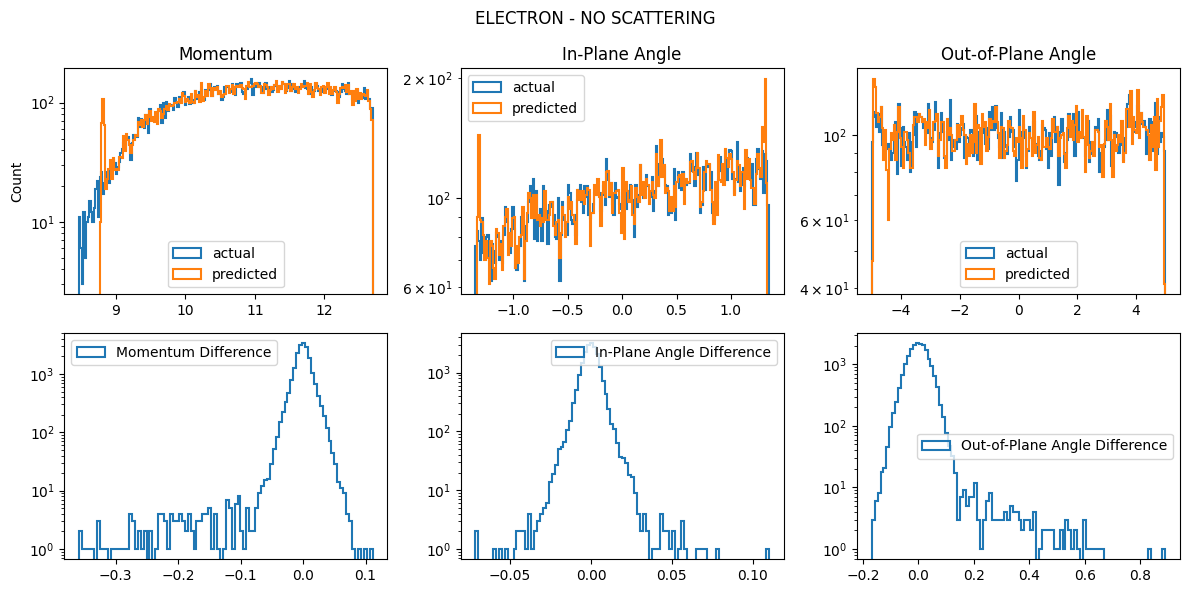

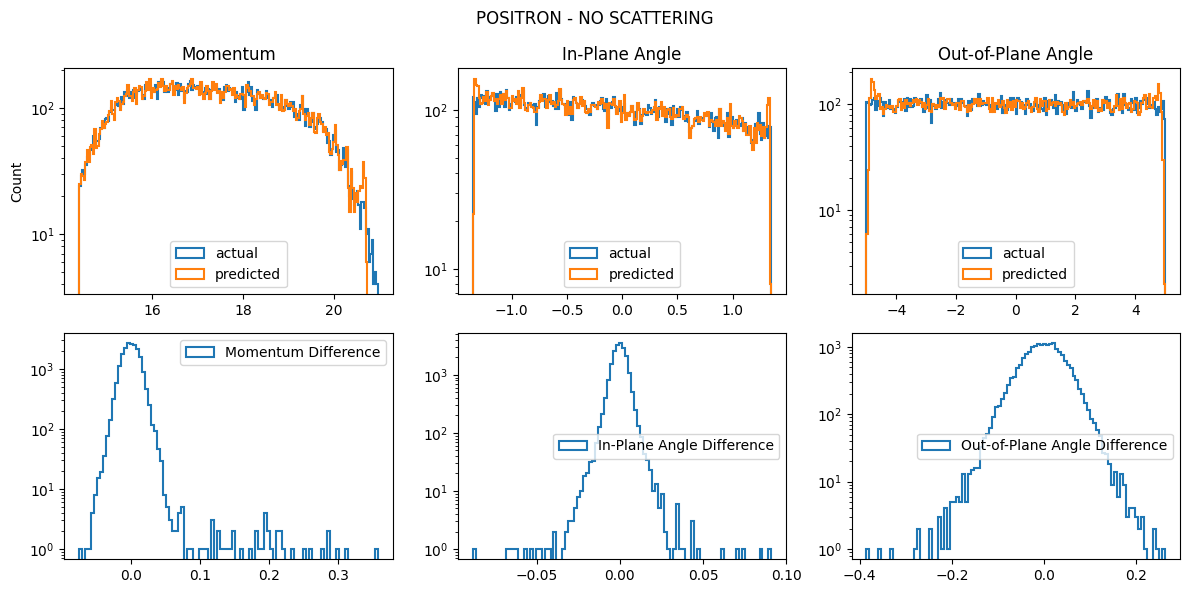

In [100]:
for i in range(2):
    p          = p_noscat[i]
    p_pred     = p_pred_noscat[i]
    ip         = ip_noscat[i]
    ip_pred    = ip_pred_noscat[i]
    oop        = oop_noscat[i]
    oop_pred   = oop_pred_noscat[i]
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Create a row of 3 subplots
    
    # plot 1: P vs P_pred
    bins_p = np.histogram_bin_edges(p, bins=200)
    axes[0][0].hist(p, label="actual", histtype='step', linewidth=1.5, bins=bins_p)
    axes[0][0].hist(p_pred, label="predicted", histtype='step', linewidth=1.5, bins=bins_p)
    axes[0][0].set_ylabel('Count')
    axes[0][0].set_yscale('log')
    axes[0][0].legend()
    axes[0][0].set_title('Momentum')
    
    # plot 1: in-plane angle
    bins_ip = np.histogram_bin_edges(ip, bins=200)
    axes[0][1].hist(ip, label="actual", histtype='step', linewidth=1.5, bins=bins_ip)
    axes[0][1].hist(ip_pred, label="predicted", histtype='step', linewidth=1.5, bins=bins_ip)
    axes[0][1].legend()
    axes[0][1].set_yscale('log')
    axes[0][1].set_title('In-Plane Angle')
    
    # plot 3: out-of-plane angle
    bins_oop = np.histogram_bin_edges(oop, bins=200)
    axes[0][2].hist(oop, label="actual", histtype='step', linewidth=1.5, bins=bins_oop)
    axes[0][2].hist(oop_pred, label="predicted", histtype='step', linewidth=1.5, bins=bins_oop)
    axes[0][2].legend()
    axes[0][2].set_yscale('log')
    axes[0][2].set_title('Out-of-Plane Angle')
    
    # plot 4: P vs P_pred diff
    axes[1][0].hist(p-p_pred, label="Momentum Difference", histtype='step', linewidth=1.5, bins=100)
    axes[1][0].set_yscale('log')
    axes[1][0].legend()
    
    # plot 5: ip1 vs ip1_pred
    axes[1][1].hist(ip-ip_pred, label="In-Plane Angle Difference", histtype='step', linewidth=1.5, bins=100)
    axes[1][1].set_yscale('log')
    axes[1][1].legend()
    
    # plot 6: ip1 vs ip1_pred
    axes[1][2].hist(oop-oop_pred, label="Out-of-Plane Angle Difference", histtype='step', linewidth=1.5, bins=100)
    axes[1][2].set_yscale('log')
    axes[1][2].legend()
    
    imgs_path = 'results/imgs/'
    
    # if scat=='y':
    #   plt.savefig(base_path + imgs_path + side + '_full_val', dpi=300)
    # else:
    #   plt.savefig(base_path + imgs_path + side + '_val', dpi=300)
    
    if i==0:
        fig.suptitle("ELECTRON - NO SCATTERING")
        plt.savefig(f"electron_no_scattering", dpi=300)
    else:
        fig.suptitle("POSITRON - NO SCATTERING")
        plt.savefig(f"positron_no_scattering", dpi=300)
    plt.tight_layout()
    plt.show()

### 3.2 Scattering

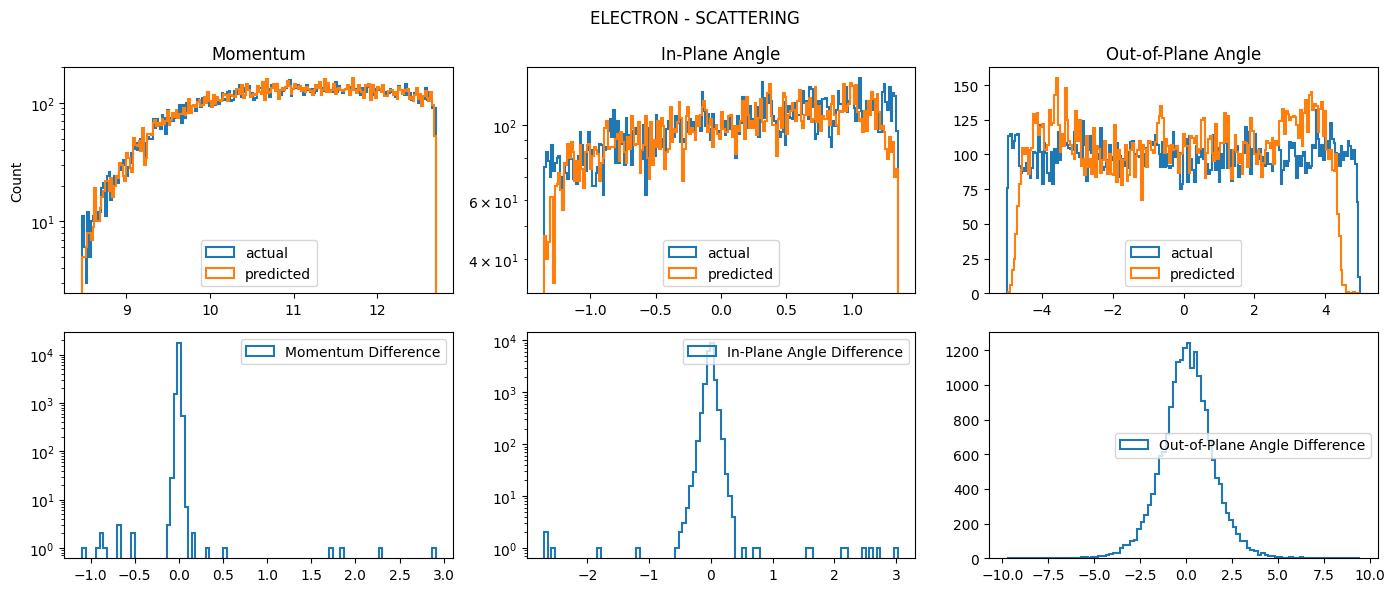

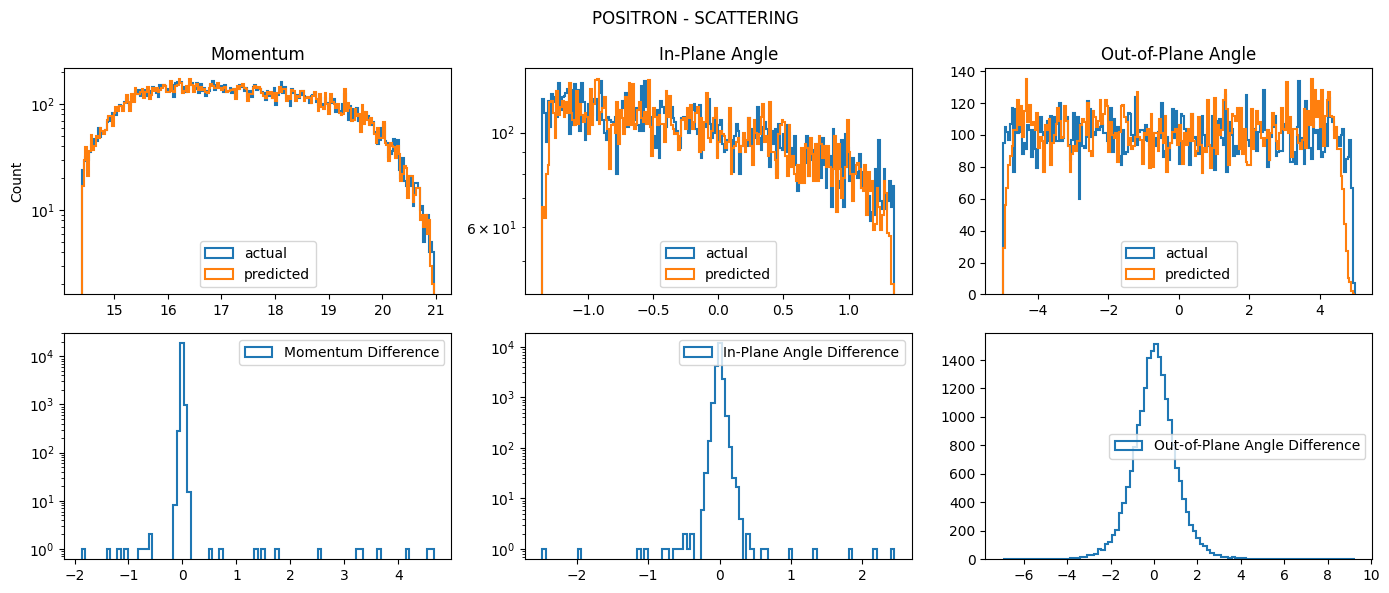

In [103]:
for i in range(2):
    p          = p_scat[i]
    p_pred     = p_pred_scat[i]
    ip         = ip_scat[i]
    ip_pred    = ip_pred_scat[i]
    oop        = oop_scat[i]
    oop_pred   = oop_pred_scat[i]
    
    fig, axes = plt.subplots(2, 3, figsize=(14, 6))  # Create a row of 3 subplots
    
    # plot 1: P vs P_pred
    bins_p = np.histogram_bin_edges(p, bins=200)
    axes[0][0].hist(p, label="actual", histtype='step', linewidth=1.5, bins=bins_p)
    axes[0][0].hist(p_pred, label="predicted", histtype='step', linewidth=1.5, bins=bins_p)
    axes[0][0].set_ylabel('Count')
    axes[0][0].legend()
    axes[0][0].set_yscale('log')
    axes[0][0].set_title('Momentum')
    
    # plot 1: in-plane angle
    bins_ip = np.histogram_bin_edges(ip, bins=200)
    axes[0][1].hist(ip, label="actual", histtype='step', linewidth=1.5, bins=bins_ip)
    axes[0][1].hist(ip_pred, label="predicted", histtype='step', linewidth=1.5, bins=bins_ip)
    axes[0][1].legend()
    axes[0][1].set_yscale('log')
    axes[0][1].set_title('In-Plane Angle')
    
    # plot 3: out-of-plane angle
    bins_oop = np.histogram_bin_edges(oop, bins=200)
    axes[0][2].hist(oop, label="actual", histtype='step', linewidth=1.5, bins=bins_oop)
    axes[0][2].hist(oop_pred, label="predicted", histtype='step', linewidth=1.5, bins=bins_oop)
    axes[0][2].legend()
    # axes[0][2].set_yscale('log')
    axes[0][2].set_title('Out-of-Plane Angle')
    
    # plot 4: P vs P_pred diff
    axes[1][0].hist(p-p_pred, label="Momentum Difference", histtype='step', linewidth=1.5, bins=100)
    axes[1][0].set_yscale('log')
    axes[1][0].legend()
    
    # plot 5: ip1 vs ip1_pred
    axes[1][1].hist(ip-ip_pred, label="In-Plane Angle Difference", histtype='step', linewidth=1.5, bins=100)
    axes[1][1].set_yscale('log')
    axes[1][1].legend()
    
    # plot 6: oop1 vs oop1_pred
    axes[1][2].hist(oop-oop_pred, label="Out-of-Plane Angle Difference", histtype='step', linewidth=1.5, bins=100)
    # axes[1][2].set_yscale('log')
    axes[1][2].legend()

    
    imgs_path = 'results/imgs/'

    
    if i==0:
        fig.suptitle("ELECTRON - SCATTERING")
        plt.savefig(f"electron_scattering", dpi=300)
    else:
        fig.suptitle("POSITRON - SCATTERING")
        plt.savefig(f"positron_scattering", dpi=300)
    plt.tight_layout()
    plt.show()

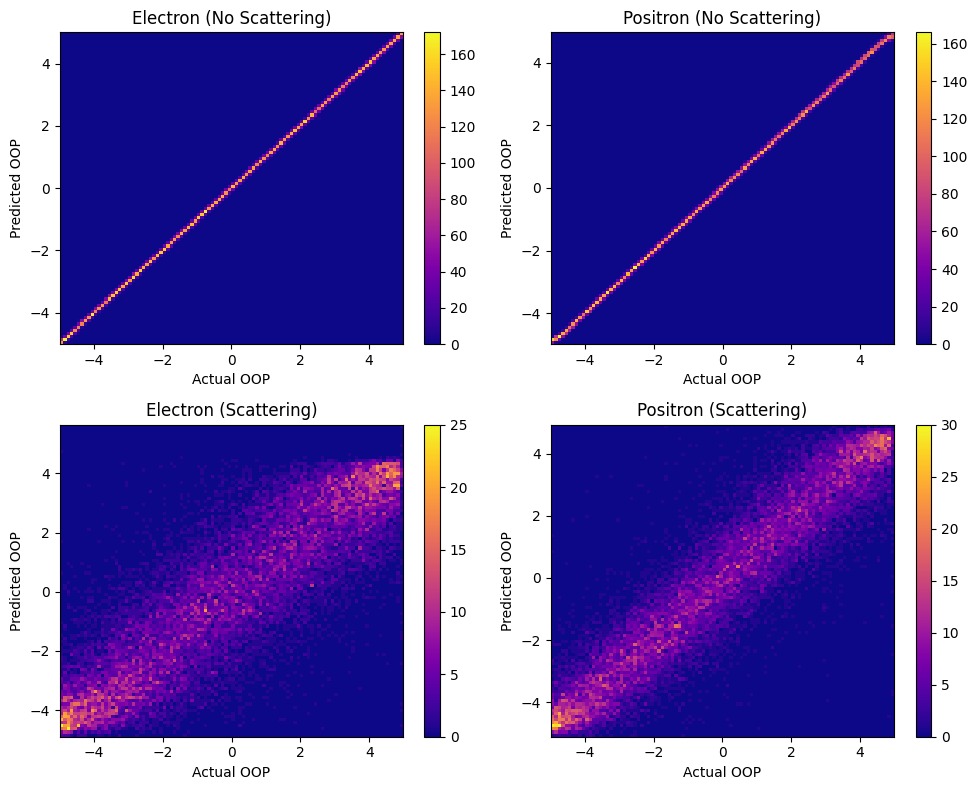

In [102]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 

# Plot 1: Electron (No Scattering)
i = 0
hist1 = axes[0, 0].hist2d(oop_noscat[i], oop_pred_noscat[i], bins=100, cmap='plasma')
fig.colorbar(hist1[3], ax=axes[0, 0])
axes[0, 0].set_xlabel("Actual OOP")
axes[0, 0].set_ylabel("Predicted OOP")
axes[0, 0].set_title("Electron (No Scattering)")

# Plot 2: Positron (No Scattering)
i = 1
hist2 = axes[0, 1].hist2d(oop_noscat[i], oop_pred_noscat[i], bins=100, cmap='plasma')
fig.colorbar(hist2[3], ax=axes[0, 1])
axes[0, 1].set_xlabel("Actual OOP")
axes[0, 1].set_ylabel("Predicted OOP")
axes[0, 1].set_title("Positron (No Scattering)")

# Plot 3: Electron (Scattering)
i = 0
hist3 = axes[1, 0].hist2d(oop_scat[i], oop_pred_scat[i], bins=100, cmap='plasma')
fig.colorbar(hist3[3], ax=axes[1, 0])
axes[1, 0].set_xlabel("Actual OOP")
axes[1, 0].set_ylabel("Predicted OOP")
axes[1, 0].set_title("Electron (Scattering)")

# Plot 4: Positron (Scattering)
i = 1
hist4 = axes[1, 1].hist2d(oop_scat[i], oop_pred_scat[i], bins=100, cmap='plasma')
fig.colorbar(hist4[3], ax=axes[1, 1])
axes[1, 1].set_xlabel("Actual OOP")
axes[1, 1].set_ylabel("Predicted OOP")
axes[1, 1].set_title("Positron (Scattering)")

plt.tight_layout()
plt.savefig("2d_hist_scattering.png", dpi=300)
plt.show()


# 4. Investigating OOP

In [108]:
electron_data = []
side = 'electron'
scat = 'y'
data_train, data_test = get_data_path(side, scat, data_path) 
print(f"Training Data:\t{data_train}")
print(f"Test Data:\t{data_test} ")

Training Data:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/ElectronCoords_wide_acp.dat
Test Data:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/ElectronSort_signal.dat 


In [109]:
particle = Analysis(side=side, 
                    scat=scat,
                    data_train = data_train,
                    data_test = data_test,
                    target = target,
                    n_jobs = 10)

Removed 830 Outliers from dataset:	train!
Removed 27 Outliers from dataset:	test!


In [165]:
best_params_oop = {'n_estimators': 2000,
                     'learning_rate': 0.2,
                     'max_depth': 20,
                     'min_child_weight': 10,
                     'gamma': 0.6160172264890478,
                     'reg_alpha': 0.02727520238169505,
                     'reg_lambda': 0.0010467691951717198,
                     'subsample': 0.6312311452261833,
                     'colsample_bytree': 0.8700248005634058}

In [166]:
# load the best param dictionary:
current_data = {}
current_data['best_params'] = best_params_oop     

# train the model:
model = particle.train_model(best_params_oop)
current_data['trained_model'] = model 

# # save the model:
# particle.save_model(base_path)

# validation set:
train_pred, val_pred = particle.validation()
current_data['train_actual'] = particle.Y_train
current_data['train_pred'] = train_pred
current_data['train_rmse'] = particle.rmse_train

current_data['val_pred']   = val_pred
current_data['val_actual'] = particle.Y_val
current_data['val_rmse'] = particle.rmse_val

# evaluate on the test set:
test_pred = particle.test()
test_actual = particle.Y_test
current_data['test_pred'] = test_pred
current_data['test_actual'] = particle.Y_test
current_data['test_rmse'] = particle.rmse_test

print(f"Length of test_pred: {len(test_pred)}")
print(f"Length of test_actual: {len(test_actual)}")

Training model with the Selected Parameters...
Model trained in 158.61 seconds.
Duration: 5.5150792598724365
Training RMSE: 0.5752
Validation RMSE: 1.6237
Test Duration: 0.5658 seconds
Test RMSE: 1.6561
Length of test_pred: 19785
Length of test_actual: 19785


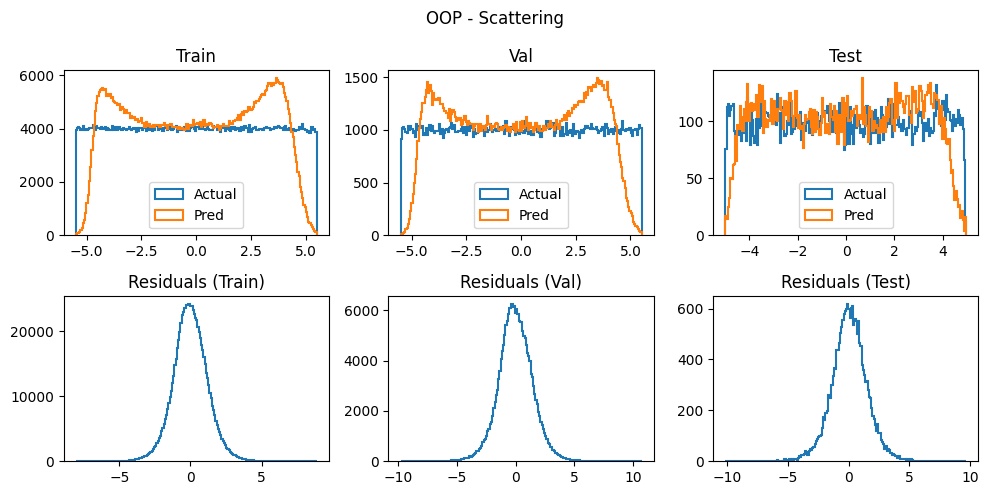

In [164]:
plot_histograms(current_data, "OOP - Scattering")

In [135]:
particle.df_train['P'].describe()

count    998321.000000
mean         10.998676
std           1.586539
min           8.250000
25%           9.624870
50%          10.999200
75%          12.371600
max          13.750000
Name: P, dtype: float64

In [136]:
particle.df_test['P'].describe()

count    19785.000000
mean        10.991622
std          1.005626
min          8.471110
25%         10.223300
50%         11.038100
75%         11.828700
max         12.694100
Name: P, dtype: float64

In [148]:
df_train = pd.read_csv(data_train, sep='\s+', header=None, names=[
        'OUT', 'EventID', 'TrackID', 'ParticleCount1', 'ParticleCount2', 'X', 'Y', 
        'dX', 'dY', 'E', 'P', 'ip', 'oop', 'vert_x', 'vert_y', 'vert_z'
    ])
df_test = df = pd.read_csv(data_test, sep='\s+', header=None, names=[
        'OUT', 'EventID', 'TrackID', 'ParticleCount1', 'ParticleCount2', 'X', 'Y', 
        'dX', 'dY', 'E', 'P', 'ip', 'oop', 'vert_x', 'vert_y', 'vert_z'
    ])

df_train = df_train[df_train['TrackID']==1]
df_test  = df_test[df_test['TrackID']==1]

print(f"Training: {data_train}")
print(f"Test: {data_test}")

Training: /home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/ElectronCoords_wide_acp.dat
Test: /home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/ElectronSort_signal.dat


In [156]:
print(f"Training:\n{df_train['oop'].agg(['min', 'max'])}\n")
print(f"Test:\n{df_test['oop'].agg(['min', 'max'])}")

Training:
min   -5.50263
max    5.50256
Name: oop, dtype: float64

Test:
min   -4.99233
max    4.97927
Name: oop, dtype: float64


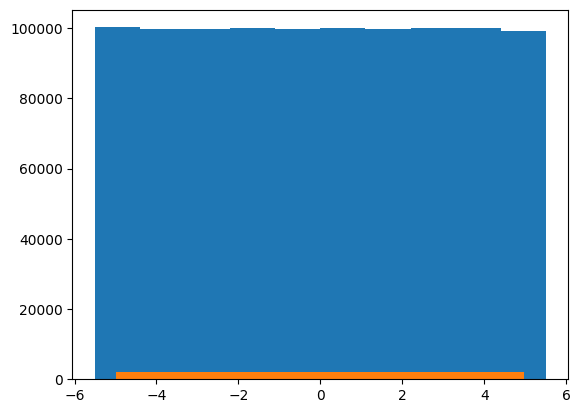

In [152]:
plt.hist(df_train['oop'], label='train')
plt.hist(df_test['oop'], label='test')
plt.show()

# 5. Save the Predicted Outputs

In [23]:
p_e_scat

{'best_params': {'n_estimators': 1239,
  'learning_rate': 0.01734916046452053,
  'max_depth': 5,
  'min_child_weight': 6,
  'gamma': 0.012548915084387602,
  'reg_alpha': 0.002065799422513789,
  'reg_lambda': 0.001120799658210081,
  'subsample': 0.8581187083070275,
  'colsample_bytree': 0.8683577879288468},
 'trained_model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8683577879288468, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.012548915084387602,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01734916046452053,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints

In [24]:
# save them
np.save('p1.npy', p_e_scat['signal_pred'])
np.save('ip1.npy', ip_e_scat['signal_pred'])
np.save('oop1.npy', oop_e_scat['signal_pred'])

np.save('p2.npy', p_p_scat['signal_pred'])
np.save('ip2.npy', ip_p_scat['signal_pred'])
np.save('oop2.npy', oop_p_scat['signal_pred'])

# 6. Visualizing OOPs 2d Histograms for Pred. vs True Signal for both - Electrons and Positrons case (Scattering Only)

In [25]:
# 2D Histogram - ELECTRON + SCATTERING
pred_oop_e = oop_e_scat['signal_pred']
true_oop_e = oop_e_scat['signal_actual']

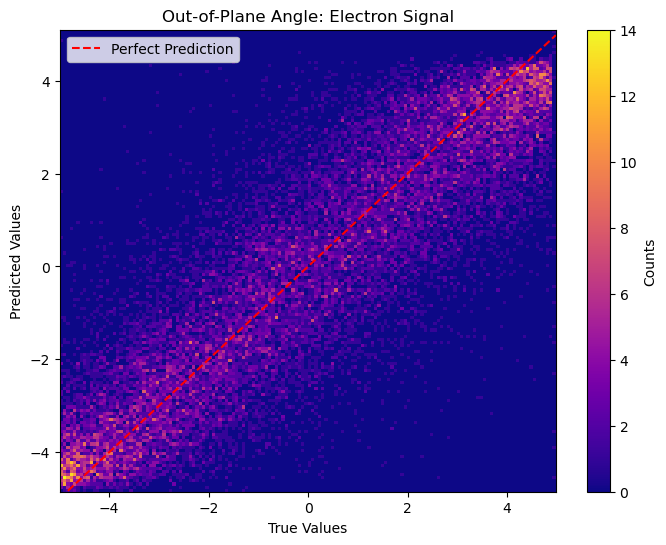

In [48]:
y_true_e = true_oop_e
y_pred_e = pred_oop_e

plt.figure(figsize=(8, 6))

# Plot 2D histogram
hist, xedges, yedges, im = plt.hist2d(y_true_e, y_pred_e, bins=150, cmap='plasma')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Counts')

# Plot y = x reference line (perfect prediction)
plt.plot([min(y_true_e), max(y_true_e)], [min(y_true_e), max(y_true_e)], 'r--', label='Perfect Prediction')

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Out-of-Plane Angle: Electron Signal')
plt.legend()

plt.show()

In [50]:
# 2D Histogram - POSITRON + SCATTERING
pred_oop_p = oop_p_scat['signal_pred']
true_oop_p = oop_p_scat['signal_actual']

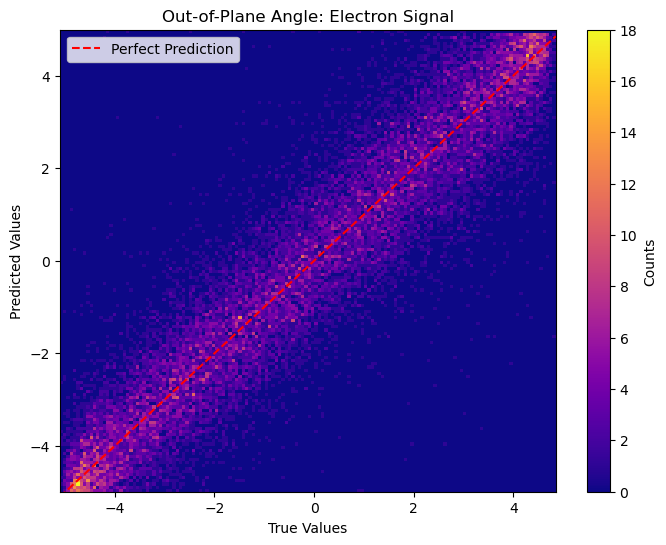

In [51]:
y_true_p = pred_oop_p
y_pred_p = true_oop_p

plt.figure(figsize=(8, 6))

# Plot 2D histogram
hist, xedges, yedges, im = plt.hist2d(y_true_p, y_pred_p, bins=150, cmap='plasma')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Counts')

# Plot y = x reference line (perfect prediction)
plt.plot([min(y_true_p), max(y_true_p)], [min(y_true_p), max(y_true_p)], 'r--', label='Perfect Prediction')

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Out-of-Plane Angle: Electron Signal')
plt.legend()

plt.show()

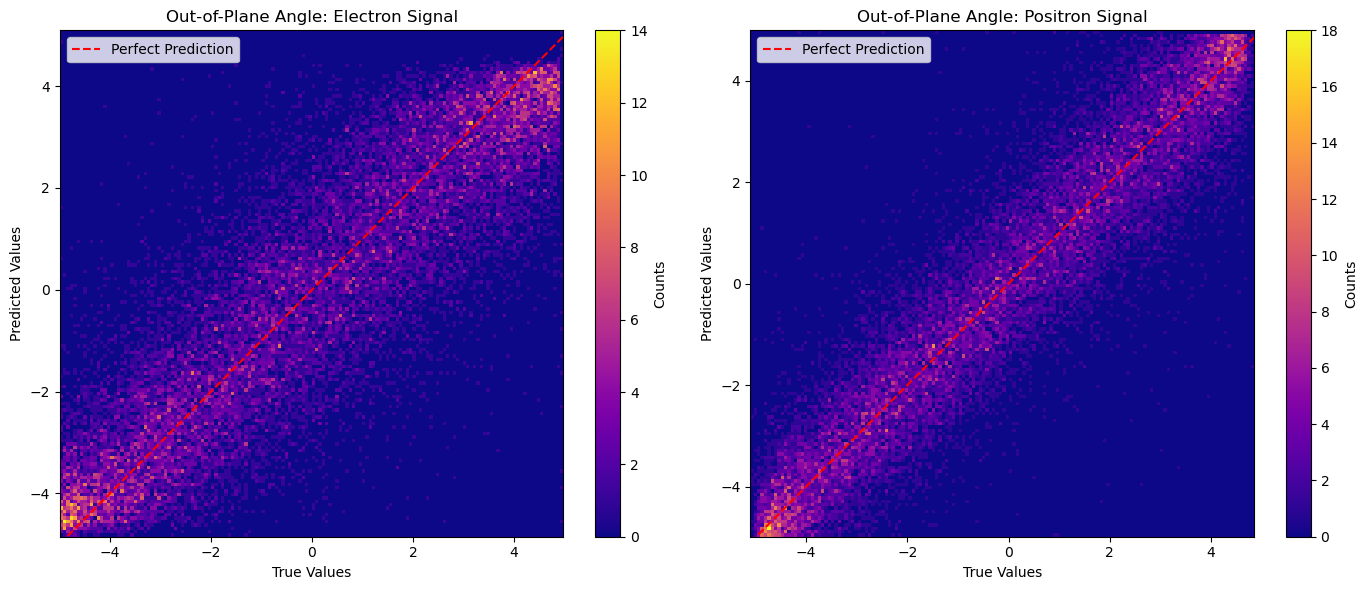

In [54]:
import matplotlib.pyplot as plt

# Define the figure and axis grid (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the first dataset
axs[0].hist2d(y_true_e, y_pred_e, bins=150, cmap='plasma')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Out-of-Plane Angle: Electron Signal')
axs[0].plot([min(y_true_e), max(y_true_e)], [min(y_true_e), max(y_true_e)], 'r--', label='Perfect Prediction')
cbar0 = plt.colorbar(axs[0].collections[0], ax=axs[0])
cbar0.set_label('Counts')
axs[0].legend()

# Plot for the second dataset
axs[1].hist2d(y_true_p, y_pred_p, bins=150, cmap='plasma')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Out-of-Plane Angle: Positron Signal')
axs[1].plot([min(y_true_p), max(y_true_p)], [min(y_true_p), max(y_true_p)], 'r--', label='Perfect Prediction')
cbar1 = plt.colorbar(axs[1].collections[0], ax=axs[1])
cbar1.set_label('Counts')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.savefig("oop_true_pred_hist", dpi=300)
plt.show()


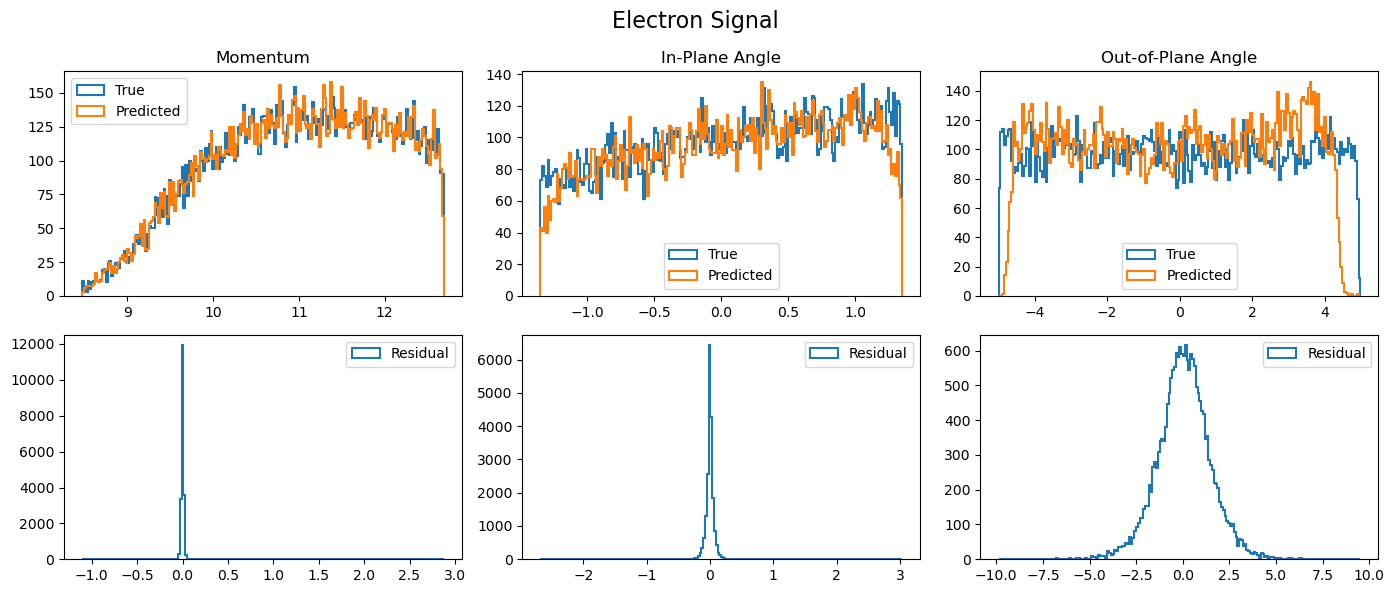

In [95]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6))

val_pred = p_e_scat['signal_pred']
val_true = p_e_scat['signal_actual']
bins = np.histogram_bin_edges(val_true, bins=200)
ax[0,0].hist(val_true, bins=bins, label="True", histtype="step", linewidth=1.5)
ax[0,0].hist(val_pred, bins=bins, label="Predicted", histtype="step", linewidth=1.5)
ax[0,0].set_title("Momentum")
ax[0,0].legend()

diff = val_true - val_pred
bins = np.histogram_bin_edges(diff, bins=200)
ax[1,0].hist(diff, bins=bins, label="Residual", histtype="step", linewidth=1.5)
ax[1,0].legend()

val_pred = ip_e_scat['signal_pred']
val_true = ip_e_scat['signal_actual']
bins = np.histogram_bin_edges(val_true, bins=200)
ax[0,1].hist(val_true, bins=bins, label="True", histtype="step", linewidth=1.5)
ax[0,1].hist(val_pred, bins=bins, label="Predicted", histtype="step", linewidth=1.5)
ax[0,1].set_title("In-Plane Angle")
ax[0,1].legend()

diff = val_true - val_pred
bins = np.histogram_bin_edges(diff, bins=200)
ax[1,1].hist(diff, bins=bins, label="Residual", histtype="step", linewidth=1.5)
ax[1,1].legend()

val_pred = oop_e_scat['signal_pred']
val_true = oop_e_scat['signal_actual']
bins = np.histogram_bin_edges(val_true, bins=200)
ax[0,2].hist(val_true, bins=bins, label="True", histtype="step", linewidth=1.5)
ax[0,2].hist(val_pred, bins=bins, label="Predicted", histtype="step", linewidth=1.5)
ax[0,2].set_title("Out-of-Plane Angle")
ax[0,2].legend()

diff = val_true - val_pred
bins = np.histogram_bin_edges(diff, bins=200)
ax[1,2].hist(diff, bins=bins, label="Residual", histtype="step", linewidth=1.5)
ax[1,2].legend()

fig.suptitle('Electron Signal', fontsize=16)
plt.tight_layout()
plt.savefig("total_signal_electron", dpi=300)
plt.show()

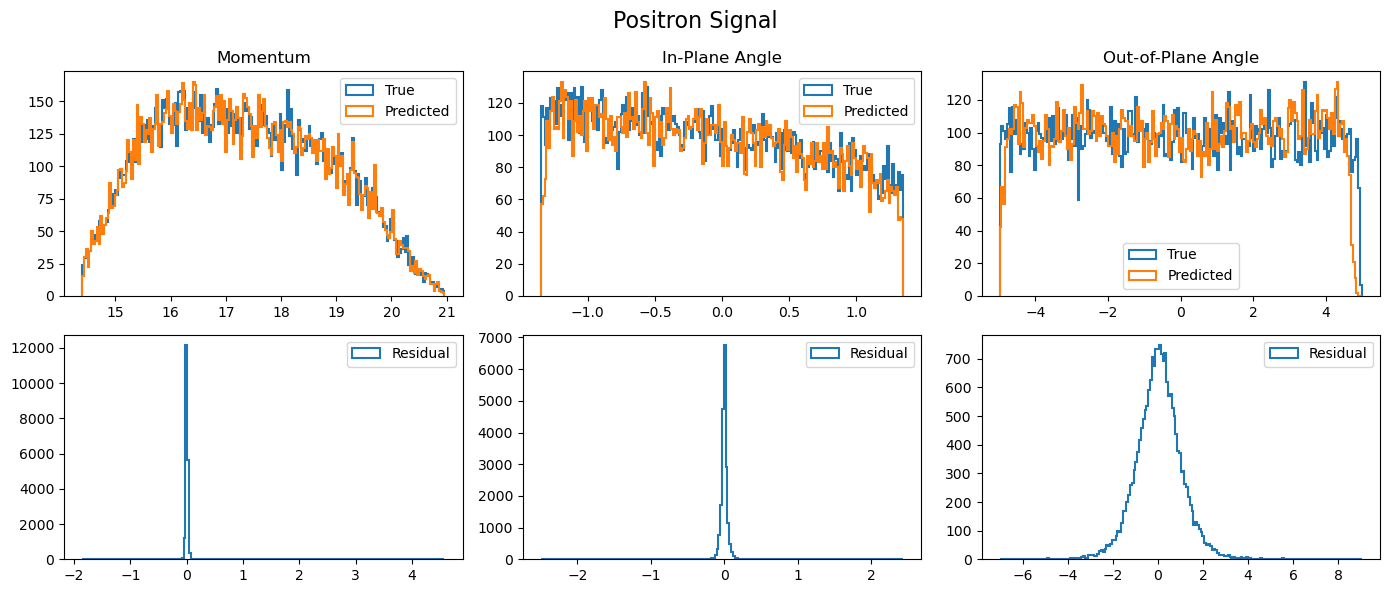

In [94]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6))

val_pred = p_p_scat['signal_pred']
val_true = p_p_scat['signal_actual']
bins = np.histogram_bin_edges(val_true, bins=200)
ax[0,0].hist(val_true, bins=bins, label="True", histtype="step", linewidth=1.5)
ax[0,0].hist(val_pred, bins=bins, label="Predicted", histtype="step", linewidth=1.5)
ax[0,0].set_title("Momentum")
ax[0,0].legend()


diff = val_true - val_pred
bins = np.histogram_bin_edges(diff, bins=200)
ax[1,0].hist(diff, bins=bins, label="Residual", histtype="step", linewidth=1.5)
ax[1,0].legend()

val_pred = ip_p_scat['signal_pred']
val_true = ip_p_scat['signal_actual']
bins = np.histogram_bin_edges(val_true, bins=200)
ax[0,1].hist(val_true, bins=bins, label="True", histtype="step", linewidth=1.5)
ax[0,1].hist(val_pred, bins=bins, label="Predicted", histtype="step", linewidth=1.5)
ax[0,1].set_title("In-Plane Angle")
ax[0,1].legend()


diff = val_true - val_pred
bins = np.histogram_bin_edges(diff, bins=200)
ax[1,1].hist(diff, bins=bins, label="Residual", histtype="step", linewidth=1.5)
ax[1,1].legend()

val_pred = oop_p_scat['signal_pred']
val_true = oop_p_scat['signal_actual']
bins = np.histogram_bin_edges(val_true, bins=200)
ax[0,2].hist(val_true, bins=bins, label="True", histtype="step", linewidth=1.5)
ax[0,2].hist(val_pred, bins=bins, label="Predicted", histtype="step", linewidth=1.5)
ax[0,2].set_title("Out-of-Plane Angle")
ax[0,2].legend()

diff = val_true - val_pred
bins = np.histogram_bin_edges(diff, bins=200)
ax[1,2].hist(diff, bins=bins, label="Residual", histtype="step", linewidth=1.5)
ax[1,2].legend()

fig.suptitle('Positron Signal', fontsize=16)
plt.tight_layout()
plt.savefig("total_signal_positron", dpi=300)
plt.show()

In [24]:
import os
import pickle 
import matplotlib.pyplot as plt

base_path = os.getcwd()  
parent_path = os.path.dirname(base_path)

raw_data_path = os.path.join(parent_path, 'data', 'raw')
results_path = os.path.join(parent_path, 'results', 'trained_models')

print("Base Path:", base_path)
print("Parent Path:", parent_path)
print("Raw Data Path:", raw_data_path)
print("Results Path:", results_path)

Base Path: /home/sid/coding/dark_light/mass_recon/notebooks
Parent Path: /home/sid/coding/dark_light/mass_recon
Raw Data Path: /home/sid/coding/dark_light/mass_recon/data/raw
Results Path: /home/sid/coding/dark_light/mass_recon/results/trained_models


In [25]:
with open(os.path.join(results_path, "results.pkl"), "rb") as f:
        loaded_results = pickle.load(f)
print("Results successfully loaded!")

Results successfully loaded!


In [26]:
loaded_results['electron'][0]['signal_pred']

array([ 9.602987, 10.248703, 12.017221, ..., 12.183023,  9.252657,
       10.15871 ], dtype=float32)

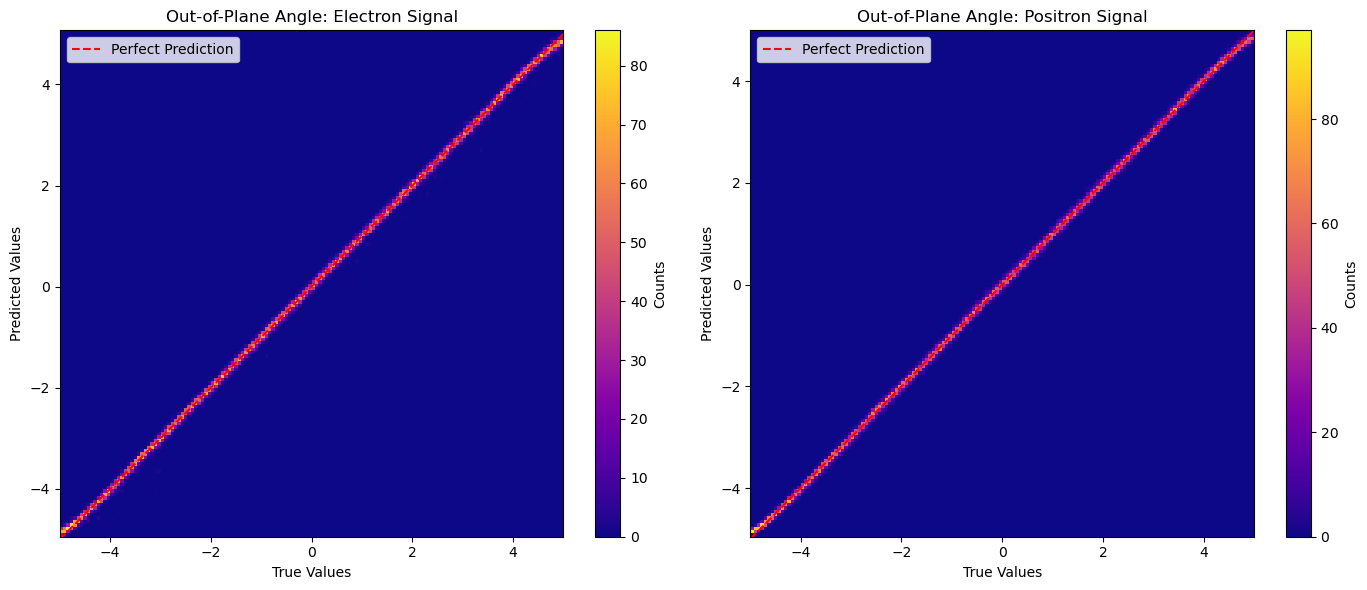

In [27]:
true_p, true_ip, true_oop = [], [], []
pred_p, pred_ip, pred_oop = [], [], []
for side in ['electron', 'positron']:
    if len(loaded_results[side]) >= 3:  
        pred_p.append(loaded_results[side][0].get('signal_pred', None))
        pred_ip.append(loaded_results[side][1].get('signal_pred', None))
        pred_oop.append(loaded_results[side][2].get('signal_pred', None))

        true_p.append(loaded_results[side][0].get('signal_actual', None))
        true_ip.append(loaded_results[side][1].get('signal_actual', None))
        true_oop.append(loaded_results[side][2].get('signal_actual', None))
    else:
        logging(f"Warning: Not enough data for {side}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the first dataset
y_true_e = true_oop[0]
y_pred_e = pred_oop[0]

axs[0].hist2d(y_true_e, y_pred_e, bins=150, cmap='plasma')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Out-of-Plane Angle: Electron Signal')
axs[0].plot([min(y_true_e), max(y_true_e)], [min(y_true_e), max(y_true_e)], 'r--', label='Perfect Prediction')
cbar0 = plt.colorbar(axs[0].collections[0], ax=axs[0])
cbar0.set_label('Counts')
axs[0].legend()

# Plot for the second dataset
y_true_p = true_oop[1]
y_pred_p = pred_oop[1]

axs[1].hist2d(y_true_p, y_pred_p, bins=150, cmap='plasma')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Out-of-Plane Angle: Positron Signal')
axs[1].plot([min(y_true_p), max(y_true_p)], [min(y_true_p), max(y_true_p)], 'r--', label='Perfect Prediction')
cbar1 = plt.colorbar(axs[1].collections[0], ax=axs[1])
cbar1.set_label('Counts')
axs[1].legend()

# Show the plots
plt.tight_layout()
# plt.savefig("oop_true_pred_hist", dpi=300)
plt.show()

In [30]:
pred_p[0][0:10], pred_ip[0][0:10]

(array([ 9.602987 , 10.248703 , 12.017221 ,  8.807207 , 11.159423 ,
         9.943619 , 11.9707575, 11.8945265, 11.0413685, 11.470159 ],
       dtype=float32),
 array([ 0.79809624,  1.0063992 , -0.2562612 ,  1.2944744 , -1.3165317 ,
         0.92466295,  0.22810729, -0.5128665 , -0.7363587 , -0.4924802 ],
       dtype=float32))

In [31]:
true_p[0][0:10], true_ip[0][0:10]

(array([ 9.59657, 10.2605 , 12.0247 ,  8.71952, 11.1759 ,  9.94128,
        11.9665 , 11.9063 , 11.045  , 11.4716 ]),
 array([ 0.791696,  1.00153 , -0.249663,  1.3052  , -1.33254 ,  0.934695,
         0.21819 , -0.512682, -0.733691, -0.502091]))